### Auroreload Functionality

In [30]:
# Load the autoreload extension to automatically reload modules when they change  
# Enables automatic reloading of all imported modules before executing code

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Importing Libraries

In [31]:
import sys
# append the path to the logs directory
sys.path.append('../logs')
sys.path.append('../src')

In [32]:
# inbuild packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import logging
from pathlib import Path
import joblib
# from ucimlrepo import fetch_ucirepo

In [33]:
# user defined modules
import utils.load_data as load_data

### Load Data

In [34]:
data_file_path = '../data/raw/air_quality.csv'
data = load_data.load_data_as_pandas_df(data_file_path)
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [35]:
data.shape

(9357, 15)

### Feature selection and IDA

In [36]:
# Select features
features = data[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]

In [37]:
features.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


<Axes: >

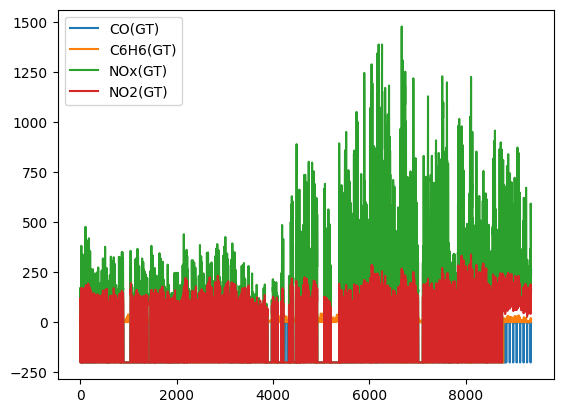

In [38]:
features.plot()

<Axes: >

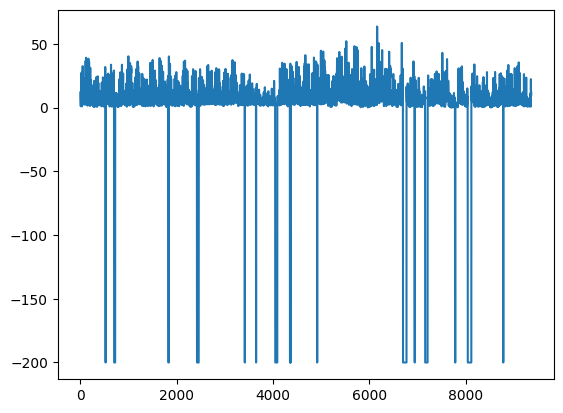

In [39]:
features['C6H6(GT)'].plot()

<Axes: >

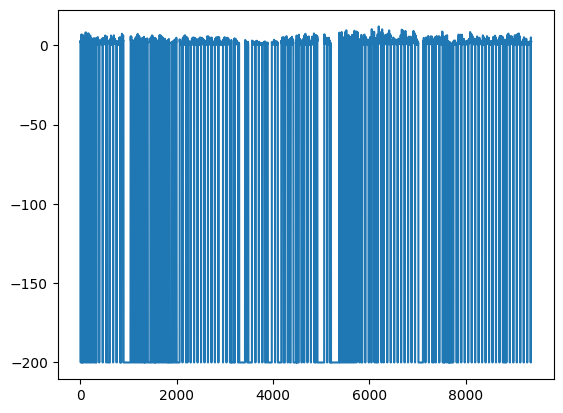

In [40]:
features['CO(GT)'].plot()

<Axes: ylabel='Frequency'>

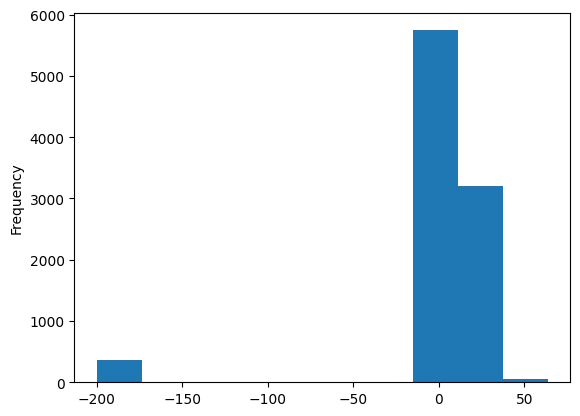

In [41]:
features['C6H6(GT)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

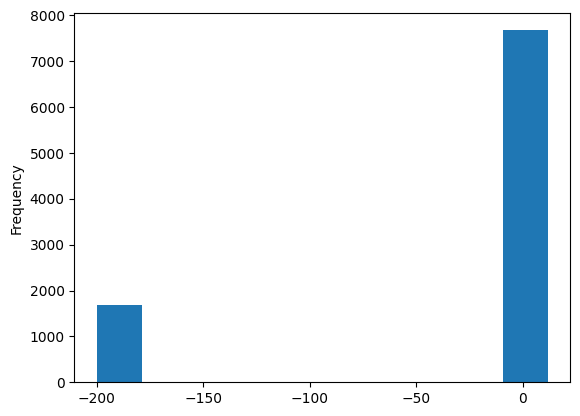

In [42]:
features['CO(GT)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

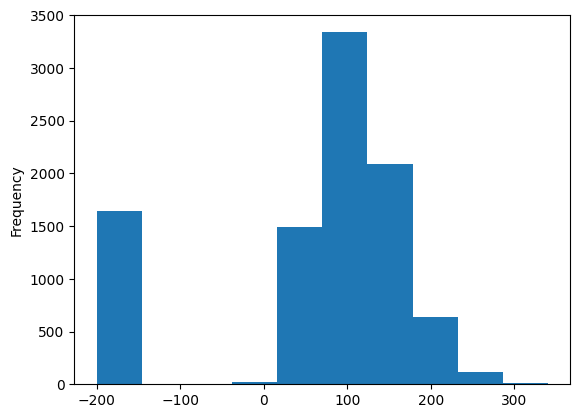

In [43]:
features['NO2(GT)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

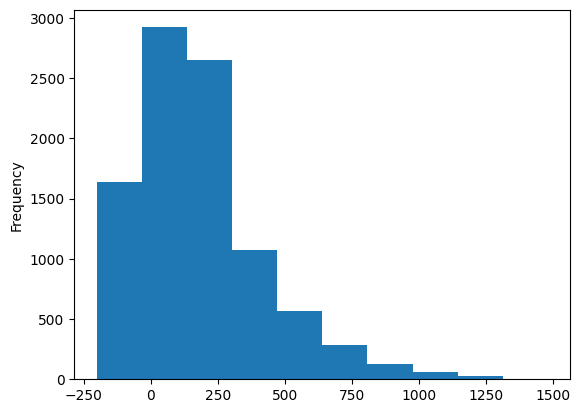

In [44]:
features['NOx(GT)'].plot(kind='hist')

In [45]:
features.describe()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
count,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1.865683,168.616971,58.148873
std,77.657170,41.380206,257.433866,126.940455
min,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,4.000000,50.000000,53.000000
50%,1.500000,7.900000,141.000000,96.000000
75%,2.600000,13.600000,284.000000,133.000000
max,11.900000,63.700000,1479.000000,340.000000


In [46]:
# Drop rows with missing values (-200)
features = features.replace(-200, np.nan)

In [47]:
features.describe()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
count,7674.000000,8991.000000,7718.000000,7715.000000
mean,2.152750,10.083105,246.896735,113.091251
std,1.453252,7.449820,212.979168,48.370108
min,0.100000,0.100000,2.000000,2.000000
25%,1.100000,4.400000,98.000000,78.000000
50%,1.800000,8.200000,180.000000,109.000000
75%,2.900000,14.000000,326.000000,142.000000
max,11.900000,63.700000,1479.000000,340.000000


In [48]:
features = features.dropna()

print(features.shape)
features.head()

(6941, 4)


,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166.0,113.0
1,2.0,9.4,103.0,92.0
2,2.2,9.0,131.0,114.0
3,2.2,9.2,172.0,122.0
4,1.6,6.5,131.0,116.0


In [49]:
features.describe()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
count,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,10.554488,250.671949,113.874082
std,1.441158,7.465226,208.611371,47.475017
min,0.100000,0.200000,2.000000,2.000000
25%,1.100000,4.900000,103.000000,79.000000
50%,1.900000,8.800000,186.000000,110.000000
75%,2.900000,14.600000,335.000000,142.000000
max,11.900000,63.700000,1479.000000,333.000000


### Model Configuration

In [50]:
# Parameters
n_estimators = 100  # Number of trees
contamination = 0.005  # Expected proportion of anomalies
sample_size = 256  # Number of samples used to train each tree

### Model Training

In [51]:
# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=n_estimators,
                            contamination=contamination,
                            max_samples=sample_size,
                            random_state=42)
iso_forest.fit(features)

IsolationForest(contamination=0.005, max_samples=256, random_state=42)

In [24]:
predict = iso_forest.predict(features)

In [25]:
type(predict)

numpy.ndarray

# save model

In [26]:
model_path = '../artifacts/models'
model_path = Path(model_path)

In [27]:
type(model_path)

pathlib._local.PosixPath

In [28]:

model_path.mkdir(parents=True, exist_ok=True)

In [29]:
with open(model_path / "modelname.joblib", "wb") as f:
    joblib.dump(iso_forest, f)